In [1]:
import pathlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# import pygad

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, optimizers
from tensorflow.keras import callbacks
from tensorflow.keras.layers import (Input, Dense, concatenate, LeakyReLU)

print(tf.__version__)



column_names = [
    "Core",
    "Inner",
    "Outer",
    "405","410","415","420","425","430","435", "440","445", "450" ,"455","460","465","470","475","480","485","490","495","500",
    "505","510","515","520","525","530","535", "540","545", "550" ,"555","560","565","570","575","580","585","590","595","600",
    "605","610","615","620","625","630","635", "640","645","650" ,"655","660","665","670","675","680","685","690","695","700",
    "705","710","715","720","725","730","735","740", "745","750" ,"755","760","765","770","775","780","785","790","796","800"
]
raw_dataset = pd.read_csv(
    'C:/Users/OIDL-Jang/Documents/Test_Set_Wavelength_2022-0117 15-00-55.csv',
    names=column_names,
    # encoding='cp949'
)
raw_data_dropna = raw_dataset.dropna()
dataset = raw_data_dropna.copy()

print(dataset)


2.5.0
       Core  Inner  Outer       405       410       415       420       425  \
0      1.73   2.82   0.61  0.000382  0.000414  0.000448  0.000485  0.000525   
1      1.93   2.00   0.49  0.000341  0.000368  0.000397  0.000429  0.000463   
6      1.68   2.98   2.72  0.000539  0.000589  0.000644  0.000705  0.000772   
7      0.17   2.65   3.84  0.642560  0.988060  1.000000  0.685670  0.341110   
9      0.88   2.07   0.78  0.000924  0.001030  0.001150  0.001287  0.001445   
...     ...    ...    ...       ...       ...       ...       ...       ...   
29993  1.76   0.25   3.46  0.000627  0.000689  0.000757  0.000834  0.000919   
29994  0.69   2.11   0.33  0.001167  0.001313  0.001483  0.001681  0.001912   
29995  1.73   2.78   2.79  0.000528  0.000577  0.000630  0.000690  0.000755   
29996  1.81   2.21   1.43  0.000448  0.000487  0.000529  0.000576  0.000627   
29998  2.00   0.56   3.46  0.000543  0.000593  0.000649  0.000710  0.000779   

            430       435  ...       755     

In [2]:

# print(dataset.tail())

x_all = dataset.iloc[:,:3]
y_all = dataset.iloc[:,3:]

x_train_all, x_test, y_train_all, y_test = train_test_split(x_all, y_all, test_size = 0.2)
# x_train_all, x_test = train_test_split(x_all, test_size = 0.2)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_all, y_train_all, test_size = 0.1)
#train_dataset = dataset.sample(frac=0.8, random_state=0)
#test_dataset = dataset.drop(train_dataset.index)

# print(x_all)

# print(x_train_all)
# print(x_train)
print(x_test)
print(y_test)

       Core  Inner  Outer
26976  1.22   1.22   3.35
21624  2.00   2.48   3.48
29614  1.32   2.48   3.44
21304  0.87   0.46   2.54
23801  0.23   1.41   4.09
...     ...    ...    ...
9799   1.58   0.86   1.70
3958   0.58   0.71   1.49
29700  2.09   2.84   3.43
5873   1.85   0.72   1.27
14904  1.07   1.79   2.94

[5041 rows x 3 columns]
            405       410       415       420       425       430       435  \
26976  0.000880  0.000979  0.001091  0.001218  0.001363  0.001530  0.001723   
21624  0.000497  0.000541  0.000590  0.000644  0.000704  0.000770  0.000843   
29614  0.000730  0.000806  0.000892  0.000988  0.001096  0.001219  0.001359   
21304  0.001826  0.002105  0.002441  0.002849  0.003348  0.003968  0.004748   
23801  1.000000  0.509070  0.200020  0.077437  0.038664  0.025211  0.018720   
...         ...       ...       ...       ...       ...       ...       ...   
9799   0.000588  0.000644  0.000706  0.000776  0.000853  0.000939  0.001035   
3958   0.005462  0.006911  0.00

In [3]:
print(x_valid)

       Core  Inner  Outer
24969  1.52   2.72   0.58
16140  1.02   0.25   0.36
2241   0.55   2.10   3.59
13591  0.96   2.91   0.20
1642   1.98   0.10   2.66
...     ...    ...    ...
17357  0.38   0.42   3.84
24781  1.05   0.43   0.59
26262  0.74   0.33   2.32
8882   0.11   1.52   0.65
28277  0.93   0.23   2.15

[2017 rows x 3 columns]


In [4]:
scaler = MinMaxScaler()
nx_train = scaler.fit_transform(x_train)
# x_valide = scaler.transform(x_valid)
nx_test  = scaler.transform(x_test)


In [5]:
print(nx_train)

[[0.54       0.95333333 0.2175    ]
 [0.58       0.45333333 0.99      ]
 [0.475      0.69333333 0.425     ]
 ...
 [0.4        0.14       0.505     ]
 [0.89       0.58666667 0.9375    ]
 [0.255      0.42       0.345     ]]


In [6]:
input_shape = Input(shape = (3,), name = "Thickness")
hidden1 = Dense(70, activation = 'LeakyReLU', name = "Hidden1")(input_shape)
hidden2 = Dense(90, activation = 'LeakyReLU', name = "Hidden2")(hidden1)
hidden3 = Dense(90, activation = 'LeakyReLU', name = "Hidden3")(hidden2)
hidden4 = Dense(90, activation = 'LeakyReLU', name = "Hidden4")(hidden3)
hidden5 = Dense(90, activation = 'LeakyReLU', name = "Hidden5")(hidden4)
hidden6 = Dense(90, activation = 'LeakyReLU', name = "Hidden6")(hidden5)
hidden7 = Dense(90, activation = 'LeakyReLU', name = "Hidden7")(hidden6)
hidden8 = Dense(90, activation = 'LeakyReLU', name = "Hidden8")(hidden7)
hidden9 = Dense(90, activation = 'LeakyReLU', name = "Hidden9")(hidden8)
hidden10 = Dense(90, activation = 'LeakyReLU', name = "Hidden10")(hidden9)
output = Dense(80, name = "Output")(hidden10)


model = keras.Model(inputs=input_shape, outputs = output)

In [7]:
model.compile(loss="mse", optimizer="Adam", metrics=["mse"],)

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Thickness (InputLayer)       [(None, 3)]               0         
_________________________________________________________________
Hidden1 (Dense)              (None, 70)                280       
_________________________________________________________________
Hidden2 (Dense)              (None, 90)                6390      
_________________________________________________________________
Hidden3 (Dense)              (None, 90)                8190      
_________________________________________________________________
Hidden4 (Dense)              (None, 90)                8190      
_________________________________________________________________
Hidden5 (Dense)              (None, 90)                8190      
_________________________________________________________________
Hidden6 (Dense)              (None, 90)                8190  

In [8]:
model.evaluate(nx_test,y_test,batch_size=32)
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience = 10, restore_best_weights = True)


158/158 [==============================] - 0s 565us/step - loss: 0.0617 - mse: 0.0617


In [9]:

history = model.fit( nx_train, y_train,
    epochs=5000,
    batch_size = 32,
    validation_data = (x_valid,y_valid),
    callbacks=[early_stop],
)


Epoch 1/5000
568/568 [==============================] - 1s 2ms/step - loss: 0.0126 - mse: 0.0126 - val_loss: 0.1313 - val_mse: 0.1313
Epoch 2/5000
568/568 [==============================] - 1s 1ms/step - loss: 0.0026 - mse: 0.0026 - val_loss: 0.1350 - val_mse: 0.1350
Epoch 3/5000
568/568 [==============================] - 1s 1ms/step - loss: 0.0015 - mse: 0.0015 - val_loss: 0.1260 - val_mse: 0.1260
Epoch 4/5000
568/568 [==============================] - 1s 1ms/step - loss: 8.8468e-04 - mse: 8.8468e-04 - val_loss: 0.1340 - val_mse: 0.1340
Epoch 5/5000
568/568 [==============================] - 1s 1ms/step - loss: 9.5246e-04 - mse: 9.5246e-04 - val_loss: 0.1357 - val_mse: 0.1357
Epoch 6/5000
568/568 [==============================] - 1s 1ms/step - loss: 9.8433e-04 - mse: 9.8433e-04 - val_loss: 0.1280 - val_mse: 0.1280
Epoch 7/5000
568/568 [==============================] - 1s 1ms/step - loss: 7.6034e-04 - mse: 7.6034e-04 - val_loss: 0.1114 - val_mse: 0.1114
Epoch 8/5000
568/568 [========

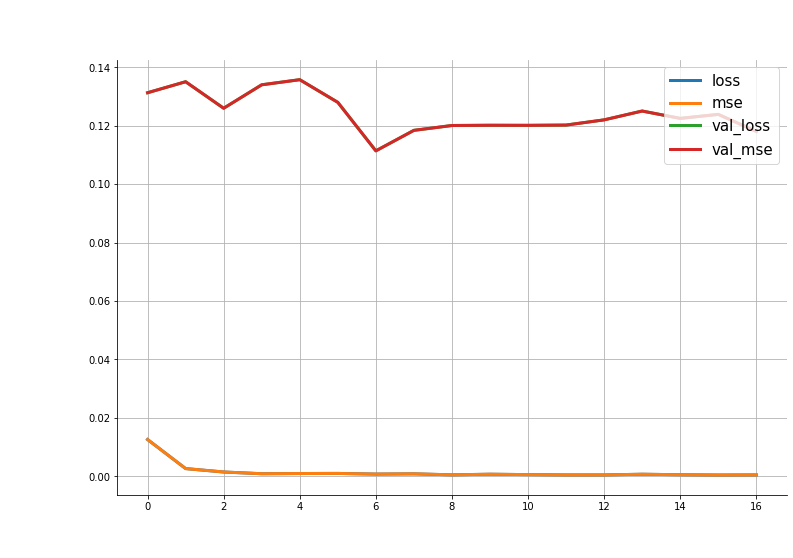

In [10]:
def Drawing_Scalars(history_name):

    history_WL = pd.DataFrame(history_name.history)
    history_WL.plot(figsize=(12,8),linewidth =3)

    plt.grid(True)

    plt.legend(loc ="upper right",fontsize = 15)

    plt.title("Learning Curve",fontsize=30, pad=30, color = 'white')
    plt.xlabel("Epoch",fontsize = 20, loc='center',labelpad = 20,color = 'white')
    plt.ylabel('Variable',fontsize=20,rotation= 0, loc = 'center', labelpad = 40,color = 'white')

    ax = plt.gca()
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)

    plt.show()


Drawing_Scalars(history)



In [11]:
# test_predictions = model.predict(x_valid).flatten()

# tf.size(test_predictions)

# print(test_predictions)

results = model.evaluate(nx_test, y_test,batch_size = 128)

predictions = model.predict(nx_test)

print(predictions)



40/40 [==============================] - 0s 844us/step - loss: 0.0021 - mse: 0.0021
[[ 0.00121134  0.00660279  0.01401418 ...  0.00766342  0.00922264
  -0.00468432]
 [ 0.00452776  0.01650376  0.01884812 ...  0.00778134  0.01216505
  -0.01165545]
 [-0.00859536  0.01528995  0.01499658 ...  0.00842733  0.0080275
  -0.0040655 ]
 ...
 [ 0.00478432  0.01586444  0.01553096 ...  0.00840002  0.00906011
  -0.01206521]
 [ 0.00168345  0.01811789  0.01777116 ...  0.00662773  0.01016048
  -0.00890762]
 [-0.00514079  0.01403242  0.0174725  ...  0.00410959  0.00781581
  -0.00885188]]


In [12]:
# import numpy as np
# import sys

# np.set_printoptions(threshold=sys.maxsize)
# print(predictions)

print(x_test)

       Core  Inner  Outer
26976  1.22   1.22   3.35
21624  2.00   2.48   3.48
29614  1.32   2.48   3.44
21304  0.87   0.46   2.54
23801  0.23   1.41   4.09
...     ...    ...    ...
9799   1.58   0.86   1.70
3958   0.58   0.71   1.49
29700  2.09   2.84   3.43
5873   1.85   0.72   1.27
14904  1.07   1.79   2.94

[5041 rows x 3 columns]


In [13]:
score = model.evaluate(x_test,y_test,verbose=1)
print(score[1])

158/158 [==============================] - 0s 769us/step - loss: 0.1117 - mse: 0.1117
0.11168736219406128


       Core  Inner  Outer
26976  1.22   1.22   3.35
21624  2.00   2.48   3.48
29614  1.32   2.48   3.44
21304  0.87   0.46   2.54
23801  0.23   1.41   4.09
...     ...    ...    ...
9799   1.58   0.86   1.70
3958   0.58   0.71   1.49
29700  2.09   2.84   3.43
5873   1.85   0.72   1.27
14904  1.07   1.79   2.94

[5041 rows x 3 columns]


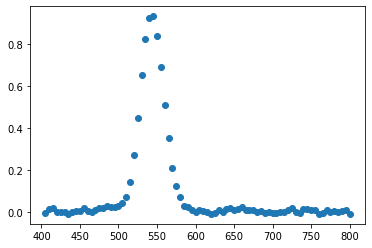

In [14]:
import numpy as np
print(x_test)

wave_range = np.arange(405,805,5)
plt.scatter(wave_range,predictions[5040,:])


TypeError: '(2720, slice(None, None, None))' is an invalid key

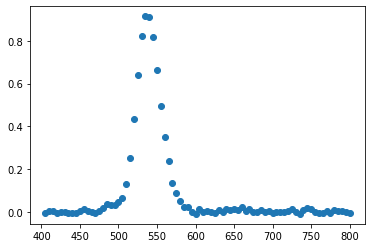

In [15]:
plt.scatter(wave_range,predictions[2720,:])
plt.scatter(wave_range,y_test[2720,:])

In [18]:
# print(y_test[2,:])
# plt.scatter(wave_range,y_test[2,:])

TypeError: '(2, slice(None, None, None))' is an invalid key